In [4]:
# Среднеквадратическая ошибка (MSE).

# Даны матрица с наблюдениями, вектор с ответами и вектор с весовыми коэффициентами и записаны в переменные X, y и w соответственно. 
# Рассчитайте среднеквадратическую ошибку по формуле

# loss = ((y - X @ w)**2).mean(axis=0)

In [5]:
import numpy as np

# 1.4 Линейная модель. Понятие переобучения

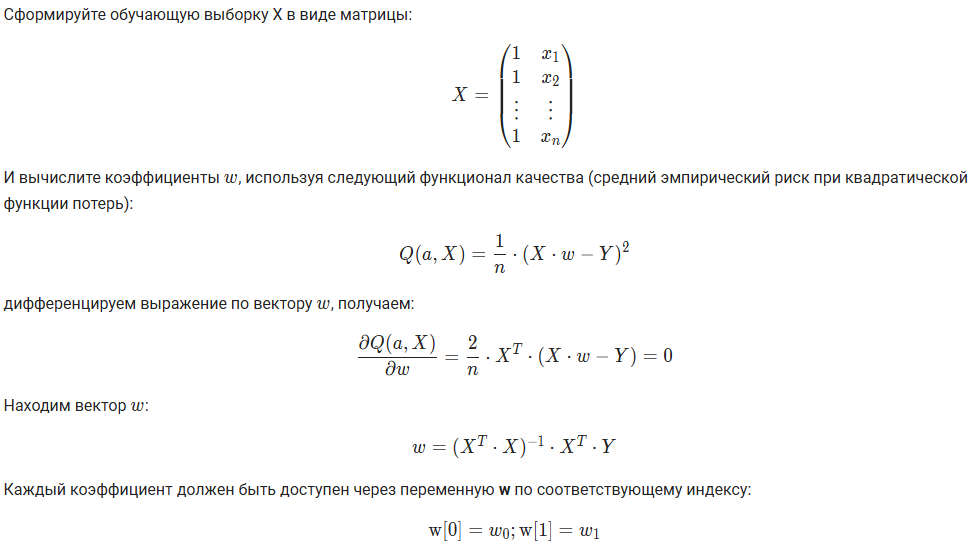

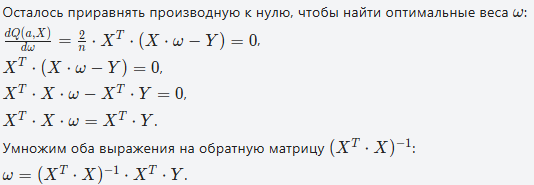

In [6]:
# Необходимо вычислить коэффициенты w модели: a(x,w)=w0 + w1 * x
# Алгоритм решения выше

np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx) # модель
Y = -5.2 + 0.7 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

# здесь продолжайте программу
X = x.reshape(len(x), 1)
X = np.c_[np.ones(X.shape[0]), X] #
X_T = np.transpose(X)
X_T_X = X_T @ X
X_T_X_inv = np.linalg.inv(X_T_X)
X_T_y = X_T @ Y
w = X_T_y @ X_T_X_inv
w

array([-5.14605924,  0.64014601])

# 1.5 Способы оценивания степени переобучения моделей

Методы оценивания степени переобучения модели <br> <br>
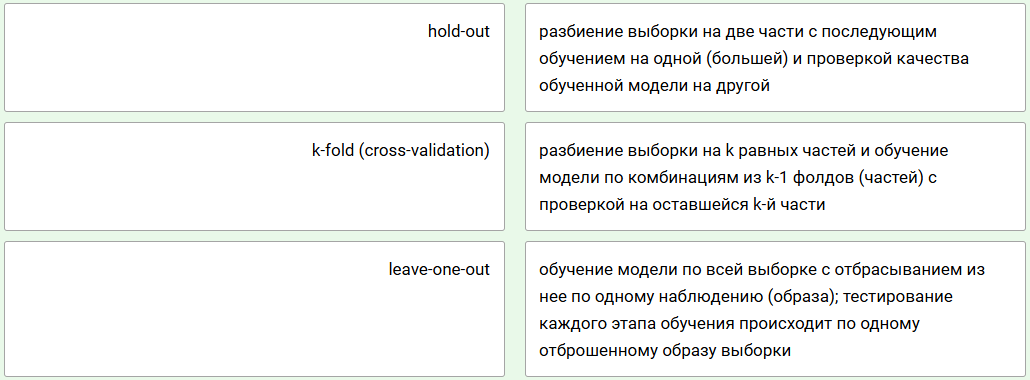

# 1.6 Уравнение гиперплоскости в задачах бинарной классификации

In [ ]:
# На рисунке представлена разделяющая линия в пространстве двух признаков w1 * x1 + w2 * x2 + w0 = 0
#  Точками отмечены координаты, через которые проходит линия. Размер клеток по каждой из координат равен 1.

# Вычислите вручную (аналитически) по графику вектор параметров: w

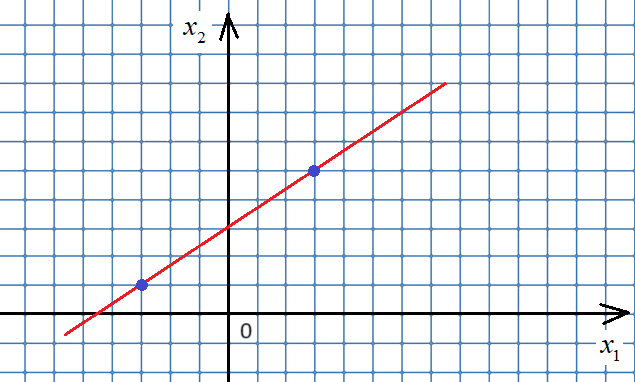

In [20]:
from sympy import symbols, Eq, solve

# w1 * x1 + w2 * x2 + w0 = 0

# Определение переменных
w1, w2, w0, x1, x2 = symbols('w1 w2 w0 x1 x2')

# Определение системы уравнений
equations = [
    Eq(-3 * w1 + w2 + 3, 0),
    Eq(3 * w1 + 5 * w2 + 3, 0)
]

# Решение системы символьно
symbolic_solution = solve(equations, (w1, w2))

# Вывод решения
print("Символьное решение:", symbolic_solution)

Символьное решение: {w1: 2/3, w2: -1}


In [27]:
exp = w1 * x1 + w2 * x2 + w0
exp = exp.subs({w1:2/3, w2:-1, w0:3})
exp.subs({x1:3, x2:5})

0

In [28]:
import sympy as sp

# Координаты точек прямой
p1, p2 = [3, 5], [-3, 1]

# Вычисляем угловой коэффициент k: k = (y2 - y1) / (x2 - x1)
k = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Подставляем значения в уравнение для нахождения смещения b (w0): y = k*x + b
w0 = p1[1] - k * p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [3.0, 0.666666666666667, -1.00000000000000]


In [31]:
import numpy as np
import sympy as sp

# Координаты точек прямой
p1, p2 = [3, 5], [-3, 1]

# Находим угловой коэффициент k и смещение b (w0)
k, w0 = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1)

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [3.0, 0.666666666666667, -1.00000000000000]


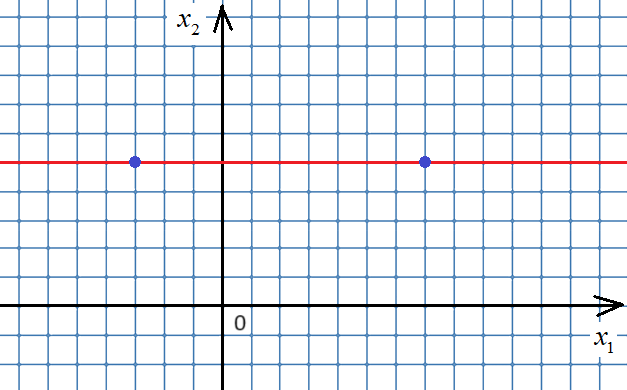

In [35]:
# Координаты точек прямой
p1, p2 = [-3, 5], [7, 5]

# Вычисляем угловой коэффициент k: k = (y2 - y1) / (x2 - x1)
k = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Подставляем значения в уравнение для нахождения смещения b (w0): y = k*x + b
w0 = p1[1] - k * p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [5.0, 0.0, -1.00000000000000]


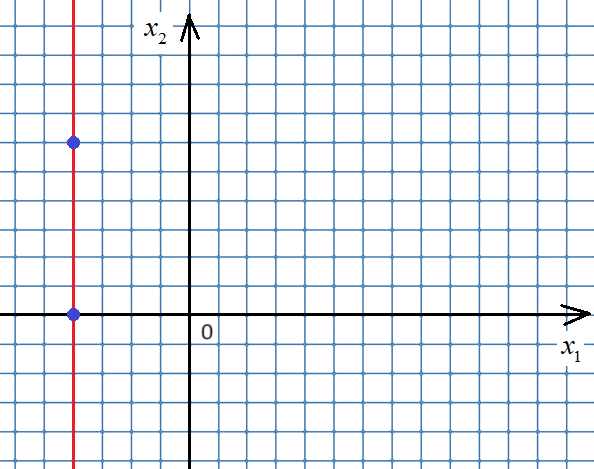

In [37]:
# Координаты точек прямой
p1, p2 = [-4, 0], [-4, 6]

# Находим угловой коэффициент k и смещение b (w0)
k, w0 = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1)

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [1.5, 0.375000000000000, 0.0]


C:\Users\kuche\AppData\Local\Temp\ipykernel_9336\108465155.py:5: RankWarning: Polyfit may be poorly conditioned
  k, w0 = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1)


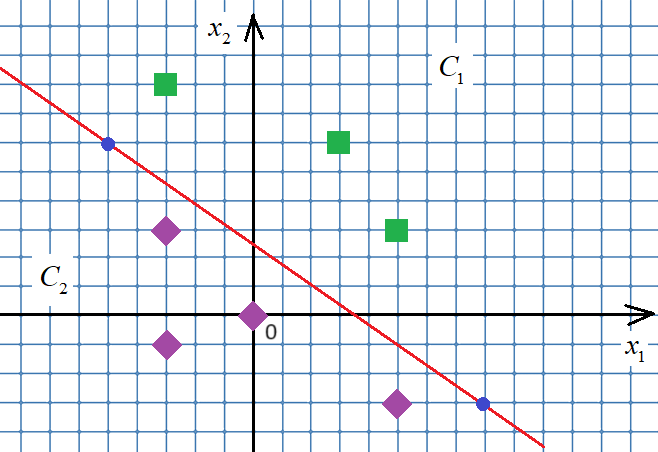

In [70]:
# Координаты точек прямой
p1, p2 = [-5, 6], [8, -3]

# Вычисляем угловой коэффициент k: k = (y2 - y1) / (x2 - x1)
k = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Подставляем значения в уравнение для нахождения смещения b (w0): y = k*x + b
w0 = p1[1] - k * p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [2.5384615384615383, -0.692307692307692, -1.00000000000000]


In [73]:
x_test = [(5, -3), (-3, 8), (3, 6), (0, 0), (5, 3), (-3, -1), (-3, 3)]

X = np.column_stack(([1] * len(x_test), x_test))
predict = np.sign(X @ w)
predict

array([1, -1, -1, 1, -1, 1, 1], dtype=object)

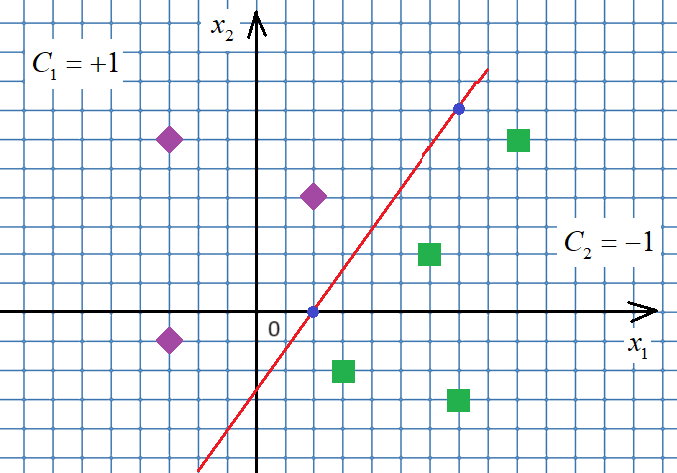

In [82]:
# Координаты точек прямой
p1, p2 = [2, 0], [7, 7]

# Вычисляем угловой коэффициент k: k = (y2 - y1) / (x2 - x1)
k = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Подставляем значения в уравнение для нахождения смещения b (w0): y = k*x + b
w0 = p1[1] - k * p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [-2.8, 1.40000000000000, -1.00000000000000]


In [88]:
x_test = [(9, 6), (2, 4), (-3, -1), (3, -2), (-3, 6), (7, -3), (6, 2)]
# поменяли знак, так как w должен быть направлен так, чтобы скалярное произведение для образом с метками +1 было положительным, 
# иначе функция sign вернет не верную метку класса
w = [2.8, -1.40000000000000, 1.00000000000000] 
X = np.column_stack(([1] * len(x_test), x_test))
predict = np.sign(X @ w)
predict

array([-1.,  1.,  1., -1.,  1., -1., -1.])

# 1.7 Решение простой задачи бинарной классификации